<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/35_Predicting_Stock_Price_Direction_with_Enhanced_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **35. Predicting Stock Price Direction with Enhanced Support Vector Machines**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/dataset_test.csv')

**Plot all data points in the dataset**

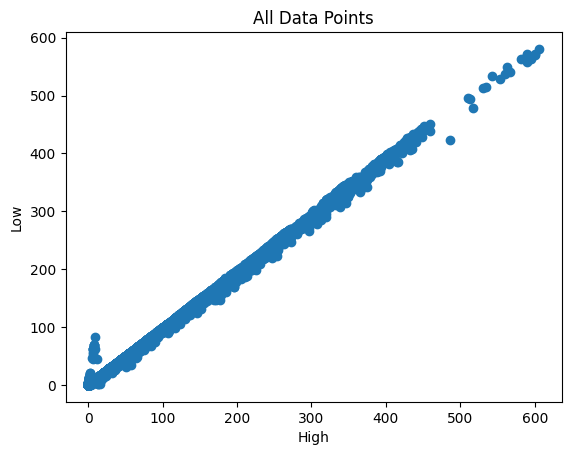

In [ ]:
plt.scatter(data['high'], data['low'])
plt.xlabel('High')
plt.ylabel('Low')
plt.title('All Data Points')
plt.show()

In [ ]:
data

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0.0,NASDAQ,2021,12,10,15,30,792397,5.4100,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1.0,NASDAQ,2021,12,9,15,30,1134639,5.4600,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2.0,NASDAQ,2021,12,8,15,30,939646,5.4700,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3.0,NASDAQ,2021,12,7,15,30,1301257,5.5100,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4.0,NASDAQ,2021,12,6,15,30,1090706,5.3650,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52523,EVK,195.0,NASDAQ,2021,3,5,15,30,77422,3.1400,...,0.3,350000.0,-60000.0,212838.8,-1.909525e+09,-8.885797e+08,18.0,18.0,292.0000,0.0
52524,EVK,196.0,NASDAQ,2021,3,4,15,30,59596,3.4216,...,0.3,350000.0,-50000.0,223129.2,-2.090594e+08,1.276414e+09,18.0,18.0,0.2300,0.0
52525,EVK,197.0,NASDAQ,2021,3,3,15,30,65122,3.5682,...,0.3,350000.0,-50000.0,229248.4,1.615113e+09,-3.751208e+08,18.0,18.0,0.2564,0.0
52526,EVK,198.0,NASDAQ,2021,3,2,15,30,87085,3.7100,...,0.3,350000.0,-50000.0,239144.5,-1.373629e+09,9.044200e+08,18.0,18.0,0.3571,0.0


In [ ]:
data.head()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
0,CNDT,0.0,NASDAQ,2021,12,10,15,30,792397,5.410,...,0.2,230000.0,-30000.0,1173839.5,1.313408e+09,-2.066295e+09,18.0,18.0,0.5781,NaN
1,CNDT,1.0,NASDAQ,2021,12,9,15,30,1134639,5.460,...,0.2,230000.0,-20000.0,1205795.2,-1.090610e+09,-4.850086e+07,18.0,18.0,0.8089,NaN
2,CNDT,2.0,NASDAQ,2021,12,8,15,30,939646,5.470,...,0.2,230000.0,-30000.0,1201770.2,-8.206629e+08,-1.021058e+09,18.0,18.0,0.6823,NaN
3,CNDT,3.0,NASDAQ,2021,12,7,15,30,1301257,5.510,...,0.2,230000.0,-30000.0,1197837.6,-4.582356e+08,1.865824e+09,18.0,18.0,0.9432,NaN
4,CNDT,4.0,NASDAQ,2021,12,6,15,30,1090706,5.365,...,0.2,230000.0,-30000.0,1189088.3,-6.176610e+08,-1.852724e+09,18.0,18.0,0.7731,NaN


In [ ]:
data.tail()

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
52523,EVK,195.0,NASDAQ,2021,3,5,15,30,77422,3.1400,...,0.3,350000.0,-60000.0,212838.8,-1.909525e+09,-8.885797e+08,18.0,18.0,292.0000,0.0
52524,EVK,196.0,NASDAQ,2021,3,4,15,30,59596,3.4216,...,0.3,350000.0,-50000.0,223129.2,-2.090594e+08,1.276414e+09,18.0,18.0,0.2300,0.0
52525,EVK,197.0,NASDAQ,2021,3,3,15,30,65122,3.5682,...,0.3,350000.0,-50000.0,229248.4,1.615113e+09,-3.751208e+08,18.0,18.0,0.2564,0.0
52526,EVK,198.0,NASDAQ,2021,3,2,15,30,87085,3.7100,...,0.3,350000.0,-50000.0,239144.5,-1.373629e+09,9.044200e+08,18.0,18.0,0.3571,0.0
52527,EVK,199.0,NASDAQ,2021,3,1,15,30,102957,3.5500,...,0.3,350000.0,-40000.0,243043.9,-1.769216e+09,1.907770e+09,18.0,18.0,0.0000,NaN


In [ ]:
data.isnull().sum()

company                            0
age                                0
market                             0
year                               0
month                              0
                               ...  
MACD_50_VOLUME                 10400
DAYS_UNTIL_END_OF_MONTH          624
DAYS_UNTIL_END_OF_TRIMESTER      624
DINAMIC3                         624
TARGET                          8550
Length: 77, dtype: int64

In [ ]:
data.info

<bound method DataFrame.info of       company    age  market  year  month  day  hour  minute   volume    high  \
0        CNDT    0.0  NASDAQ  2021     12   10    15      30   792397  5.4100   
1        CNDT    1.0  NASDAQ  2021     12    9    15      30  1134639  5.4600   
2        CNDT    2.0  NASDAQ  2021     12    8    15      30   939646  5.4700   
3        CNDT    3.0  NASDAQ  2021     12    7    15      30  1301257  5.5100   
4        CNDT    4.0  NASDAQ  2021     12    6    15      30  1090706  5.3650   
...       ...    ...     ...   ...    ...  ...   ...     ...      ...     ...   
52523     EVK  195.0  NASDAQ  2021      3    5    15      30    77422  3.1400   
52524     EVK  196.0  NASDAQ  2021      3    4    15      30    59596  3.4216   
52525     EVK  197.0  NASDAQ  2021      3    3    15      30    65122  3.5682   
52526     EVK  198.0  NASDAQ  2021      3    2    15      30    87085  3.7100   
52527     EVK  199.0  NASDAQ  2021      3    1    15      30   102957  3.5500

In [ ]:
data.shape

(52528, 77)

In [ ]:
data.columns.tolist()

['company',
 'age',
 'market',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'volume',
 'high',
 'low',
 'close',
 'open',
 'AVERAGE_SMA_3_CLOSE',
 'EMA_3_CLOSE',
 'MACD_3_CLOSE',
 'AVERAGE_SMA_3_OPENHIGH',
 'EMA_3_OPENHIGH',
 'MACD_3_OPENHIGH',
 'AVERAGE_SMA_3_HIGHLOW',
 'EMA_3_HIGHLOW',
 'MACD_3_HIGHLOW',
 'AVERAGE_SMA_3_VOLUME',
 'EMA_3_VOLUME',
 'MACD_3_VOLUME',
 'AVERAGE_SMA_4_CLOSE',
 'EMA_4_CLOSE',
 'MACD_4_CLOSE',
 'AVERAGE_SMA_4_OPENHIGH',
 'EMA_4_OPENHIGH',
 'MACD_4_OPENHIGH',
 'AVERAGE_SMA_4_HIGHLOW',
 'EMA_4_HIGHLOW',
 'MACD_4_HIGHLOW',
 'AVERAGE_SMA_4_VOLUME',
 'EMA_4_VOLUME',
 'MACD_4_VOLUME',
 'AVERAGE_SMA_7_CLOSE',
 'EMA_7_CLOSE',
 'MACD_7_CLOSE',
 'AVERAGE_SMA_7_OPENHIGH',
 'EMA_7_OPENHIGH',
 'MACD_7_OPENHIGH',
 'AVERAGE_SMA_7_HIGHLOW',
 'EMA_7_HIGHLOW',
 'MACD_7_HIGHLOW',
 'AVERAGE_SMA_7_VOLUME',
 'EMA_7_VOLUME',
 'MACD_7_VOLUME',
 'AVERAGE_SMA_20_CLOSE',
 'EMA_20_CLOSE',
 'MACD_20_CLOSE',
 'AVERAGE_SMA_20_OPENHIGH',
 'EMA_20_OPENHIGH',
 'MACD_20_OPENHIGH',
 'AVERAG

In [ ]:
data.info

<bound method DataFrame.info of       company    age  market  year  month  day  hour  minute   volume    high  \
0        CNDT    0.0  NASDAQ  2021     12   10    15      30   792397  5.4100   
1        CNDT    1.0  NASDAQ  2021     12    9    15      30  1134639  5.4600   
2        CNDT    2.0  NASDAQ  2021     12    8    15      30   939646  5.4700   
3        CNDT    3.0  NASDAQ  2021     12    7    15      30  1301257  5.5100   
4        CNDT    4.0  NASDAQ  2021     12    6    15      30  1090706  5.3650   
...       ...    ...     ...   ...    ...  ...   ...     ...      ...     ...   
52523     EVK  195.0  NASDAQ  2021      3    5    15      30    77422  3.1400   
52524     EVK  196.0  NASDAQ  2021      3    4    15      30    59596  3.4216   
52525     EVK  197.0  NASDAQ  2021      3    3    15      30    65122  3.5682   
52526     EVK  198.0  NASDAQ  2021      3    2    15      30    87085  3.7100   
52527     EVK  199.0  NASDAQ  2021      3    1    15      30   102957  3.5500

In [ ]:
data.dtypes

company                         object
age                            float64
market                          object
year                             int64
month                            int64
                                ...   
MACD_50_VOLUME                 float64
DAYS_UNTIL_END_OF_MONTH        float64
DAYS_UNTIL_END_OF_TRIMESTER    float64
DINAMIC3                       float64
TARGET                         float64
Length: 77, dtype: object

In [ ]:
A = data['TARGET'].value_counts

In [ ]:
print(A)

<bound method IndexOpsMixin.value_counts of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
52523    0.0
52524    0.0
52525    0.0
52526    0.0
52527    NaN
Name: TARGET, Length: 52528, dtype: float64>


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info

<bound method DataFrame.info of       company    age  market  year  month  day  hour  minute   volume    high  \
21       CNDT   21.0  NASDAQ  2021     11   10    15      30  1276090  6.1680   
22       CNDT   22.0  NASDAQ  2021     11    9    15      30  2271889  6.2000   
23       CNDT   23.0  NASDAQ  2021     11    8    15      30  1670784  6.3400   
24       CNDT   24.0  NASDAQ  2021     11    5    14      30  4124330  6.7400   
25       CNDT   25.0  NASDAQ  2021     11    4    14      30  1129657  7.2100   
...       ...    ...     ...   ...    ...  ...   ...     ...      ...     ...   
52522     EVK  194.0  NASDAQ  2021      3    8    15      30    41685  3.0200   
52523     EVK  195.0  NASDAQ  2021      3    5    15      30    77422  3.1400   
52524     EVK  196.0  NASDAQ  2021      3    4    15      30    59596  3.4216   
52525     EVK  197.0  NASDAQ  2021      3    3    15      30    65122  3.5682   
52526     EVK  198.0  NASDAQ  2021      3    2    15      30    87085  3.7100

In [ ]:
data

,company,age,market,year,month,day,hour,minute,volume,high,...,AVERAGE_SMA_50_HIGHLOW,EMA_50_HIGHLOW,MACD_50_HIGHLOW,AVERAGE_SMA_50_VOLUME,EMA_50_VOLUME,MACD_50_VOLUME,DAYS_UNTIL_END_OF_MONTH,DAYS_UNTIL_END_OF_TRIMESTER,DINAMIC3,TARGET
21,CNDT,21.0,NASDAQ,2021,11,10,15,30,1276090,6.1680,...,0.2,240000.0,10000.0,1119416.0,-1.570424e+09,3.839233e+08,18.0,18.0,1.0055,0.0
22,CNDT,22.0,NASDAQ,2021,11,9,15,30,2271889,6.2000,...,0.2,240000.0,10000.0,1133273.3,-5.981061e+08,1.436970e+09,18.0,18.0,1.7866,0.0
23,CNDT,23.0,NASDAQ,2021,11,8,15,30,1670784,6.3400,...,0.2,240000.0,0.0,1104294.2,4.876249e+08,5.222449e+08,18.0,18.0,1.3572,0.0
24,CNDT,24.0,NASDAQ,2021,11,5,14,30,4124330,6.7400,...,0.2,240000.0,10000.0,1091732.5,8.107868e+08,-2.090515e+09,18.0,18.0,3.4500,0.0
25,CNDT,25.0,NASDAQ,2021,11,4,14,30,1129657,7.2100,...,0.2,230000.0,20000.0,1019806.6,1.899391e+09,-1.671812e+09,18.0,18.0,1.1452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52522,EVK,194.0,NASDAQ,2021,3,8,15,30,41685,3.0200,...,0.4,350000.0,-50000.0,208234.8,2.076410e+09,8.794603e+08,18.0,18.0,0.1624,0.0
52523,EVK,195.0,NASDAQ,2021,3,5,15,30,77422,3.1400,...,0.3,350000.0,-60000.0,212838.8,-1.909525e+09,-8.885797e+08,18.0,18.0,292.0000,0.0
52524,EVK,196.0,NASDAQ,2021,3,4,15,30,59596,3.4216,...,0.3,350000.0,-50000.0,223129.2,-2.090594e+08,1.276414e+09,18.0,18.0,0.2300,0.0
52525,EVK,197.0,NASDAQ,2021,3,3,15,30,65122,3.5682,...,0.3,350000.0,-50000.0,229248.4,1.615113e+09,-3.751208e+08,18.0,18.0,0.2564,0.0


In [ ]:
correlation = data.corr()['TARGET'].sort_values(ascending=False)
print(correlation)

<ipython-input-62-46f39b16816c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['TARGET'].sort_values(ascending=False)


TARGET                         1.000000
hour                           0.043539
MACD_50_HIGHLOW                0.027689
MACD_7_CLOSE                   0.025403
MACD_20_CLOSE                  0.022625
                                 ...   
low                           -0.037951
year                                NaN
minute                              NaN
DAYS_UNTIL_END_OF_MONTH             NaN
DAYS_UNTIL_END_OF_TRIMESTER         NaN
Name: TARGET, Length: 75, dtype: float64


In [ ]:
data = pd.get_dummies(data, columns=['company', 'market'])

In [ ]:
data.head()

,age,year,month,day,hour,minute,volume,high,low,close,...,company_ESTA,company_ETACU,company_ETNB,company_ETON,company_ETTX,company_EVBG,company_EVER,company_EVGN,company_EVK,market_NASDAQ
21,21.0,2021,11,10,15,30,1276090,6.168,5.910,5.91,...,0,0,0,0,0,0,0,0,0,1
22,22.0,2021,11,9,15,30,2271889,6.200,5.800,6.06,...,0,0,0,0,0,0,0,0,0,1
23,23.0,2021,11,8,15,30,1670784,6.340,6.060,6.10,...,0,0,0,0,0,0,0,0,0,1
24,24.0,2021,11,5,14,30,4124330,6.740,6.150,6.21,...,0,0,0,0,0,0,0,0,0,1
25,25.0,2021,11,4,14,30,1129657,7.210,7.005,7.03,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.dtypes

age              float64
year               int64
month              int64
day                int64
hour               int64
                  ...   
company_EVBG       uint8
company_EVER       uint8
company_EVGN       uint8
company_EVK        uint8
market_NASDAQ      uint8
Length: 285, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'year', 'month', 'day', 'hour', 'minute', 'volume', 'high','low', 'close'] # Add other numerical columns

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
print(data.columns)

Index(['age', 'year', 'month', 'day', 'hour', 'minute', 'volume', 'high',
       'low', 'close',
       ...
       'company_ESTA', 'company_ETACU', 'company_ETNB', 'company_ETON',
       'company_ETTX', 'company_EVBG', 'company_EVER', 'company_EVGN',
       'company_EVK', 'market_NASDAQ'],
      dtype='object', length=285)


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['TARGET'])
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Plot train and test data**

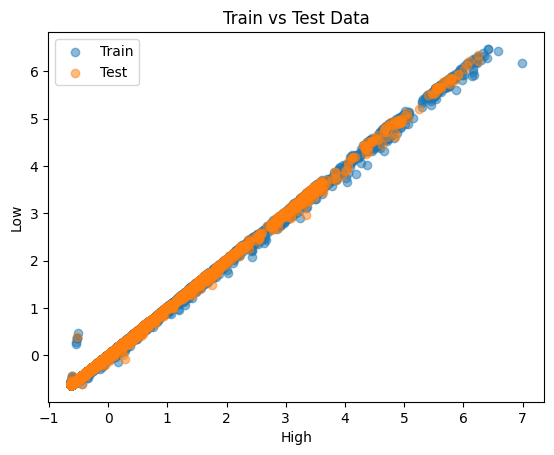

In [ ]:
plt.scatter(X_train['high'], X_train['low'], label='Train', alpha=0.5)
plt.scatter(X_test['high'], X_test['low'], label='Test', alpha=0.5)
plt.xlabel('High')
plt.ylabel('Low')
plt.title('Train vs Test Data')
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

**Training efficiency plot**

In [ ]:
train_accuracy = svm_model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9467042066909572


**Testing efficiency plot**

In [ ]:
test_accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Testing Accuracy: {test_accuracy}")

Testing Accuracy: 0.949523052464229


**Calculate overall efficiency of the model**

In [ ]:
y_pred = svm_model.predict(X_test_scaled)
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy}")

Overall Accuracy: 0.949523052464229


In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.949523052464229
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      7162
         1.0       0.86      0.02      0.03       386

    accuracy                           0.95      7548
   macro avg       0.90      0.51      0.50      7548
weighted avg       0.94      0.95      0.93      7548



**Plot overall efficiency of the model**

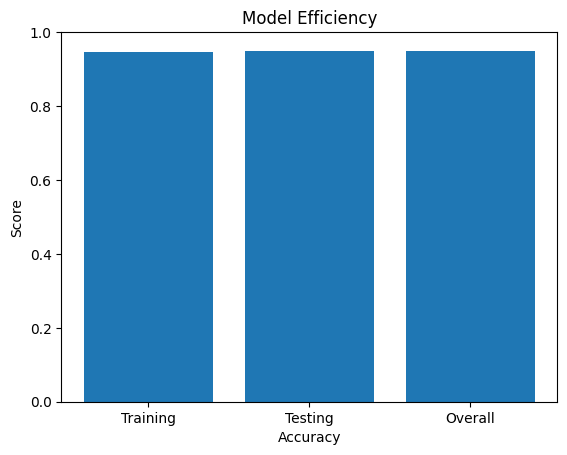

In [ ]:
plt.bar(['Training', 'Testing', 'Overall'], [train_accuracy, test_accuracy, overall_accuracy])
plt.ylim(0, 1)
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('Model Efficiency')
plt.show()